<a href="https://colab.research.google.com/github/Andurazo/Project-8-Crazy-Taxi/blob/main/Proyecto_S8_Crazy_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción#

En un mercado de transporte urbano cada vez más competitivo, Zuber se adentra en Chicago con la misión de ofrecer una experiencia de viaje innovadora y eficiente. Este estudio tiene como objetivo analizar los patrones de movilidad de los usuarios de la ciudad, con el fin de comprender mejor sus necesidades y preferencias.

Utilizando una robusta base de datos que incluye información sobre viajes realizados por diversas compañías de transporte, se llevará a cabo un análisis exhaustivo para identificar tendencias y patrones en el comportamiento de los pasajeros. Particularmente, se explorará el impacto de factores externos, como las condiciones climáticas, en la demanda de servicios de transporte compartido.

A través de este análisis, se busca responder preguntas clave como: ¿Cuáles son los factores que influyen en la elección de un servicio de transporte compartido sobre otro? ¿Cómo afectan las condiciones climáticas adversas a la frecuencia de los viajes? ¿Existen patrones estacionales en la demanda de transporte?

Los hallazgos de esta investigación servirán como base para desarrollar estrategias de negocio más efectivas para Zuber, permitiéndonos adaptar nuestros servicios a las necesidades específicas de los usuarios de Chicago y posicionarnos como líderes en el mercado de movilidad urbana.

#Paso 4. Análisis exploratorio de datos (Python)
*Se importan las librerías necesarias para iniciar el análisis, se realiza un info() para explorar los datos de forma general, tambien se obtienen duplicados y valores nulos.*


In [ ]:
import math
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import drive
import sqlite3


drive.mount('/content/drive')
file_path_1 = '/content/drive/MyDrive/moved_project_sql_result_01.csv'
file_path_2 = '/content/drive/MyDrive/moved_project_sql_result_04.csv'
file_path_3 = '/content/drive/MyDrive/moved_project_sql_result_07.csv'

taxi = pd.read_csv(file_path_1)
chicago = pd.read_csv(file_path_2)
loop = pd.read_csv(file_path_3)

Mounted at /content/drive


In [ ]:
taxi.info()
print("\n" *1)
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
taxi_na = taxi.isna().sum().sum()
chicago_na = chicago.isna().sum().sum()
print(f'La tabla taxi tiene {taxi_na} valores nulos y la tabla chicago tiene {chicago_na} valores nulos')

La tabla taxi tiene 0 valores nulos y la tabla chicago tiene 0 valores nulos


In [ ]:
taxi_dup = taxi.duplicated().sum().sum()
chicago_dup = chicago.duplicated().sum().sum()
print(f'La tabla taxi tiene {taxi_dup} valores duplicados y la tabla chicago tiene {chicago_dup} valores duplicados')

La tabla taxi tiene 0 valores duplicados y la tabla chicago tiene 0 valores duplicados


In [ ]:
print(taxi.head())
print("\n")
print(chicago.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


*Se estudian los datos que contiene cada dataframe, no se detectan duplicados o valores nulos. Tampoco se detecta algun tipo de dato que afecte la integridad de los datos por lo que se decide dejarlos tal y como están.*

Identificar los 10 principales barrios en términos de finalización del recorrido


In [ ]:
top_10_neighborhoods = chicago.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods)
print("\n")
top_10_companies = taxi.sort_values(by='trips_amount', ascending=False).head(10)
print(top_10_companies)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


*Se ordenan los datos en función a average_trips en orden descendente y se obtienen las primeras 10 filas en función al promedio de viajes.
Se hace lo propio con las compañías de taxi y el monto de sus viajes.*

Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones.

Sacar conclusiones basadas en cada gráfico y explicar los resultados


<ipython-input-11-a10af14c84e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trips_amount', y='company_name', data=top_taxi_companies, palette='viridis')


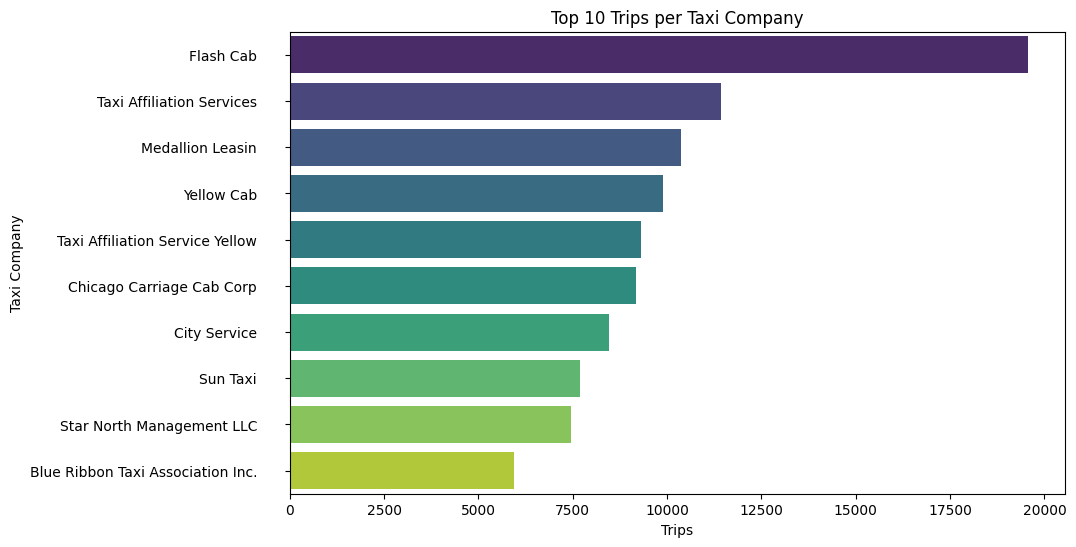

In [ ]:
top_taxi_companies = taxi.sort_values(by='trips_amount', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='trips_amount', y='company_name', data=top_taxi_companies, palette='viridis')
plt.gca().yaxis.set_tick_params(pad=20)
plt.xlabel('Trips')
plt.ylabel('Taxi Company')
plt.title('Top 10 Trips per Taxi Company')
plt.show()

*De acuerdo a la gráfica observamos que Flash Cab es la compañía mas solicitada por la clientela en el mercado de Chicago, con un número sobresaliente en cuanto a viajes. Los persigue de cerca Taxi Affiliation Services y Medallion Leasin. Yellow Cab y Taxi Affiliation Service Yellow cuentan con una participación moderada en el mercado por lo cual no se pueden descartar que puedan incrementar sus niveles en el corto-mediano plazo.*

<ipython-input-8-6c332d358c4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_neighborhoods, palette='magma')


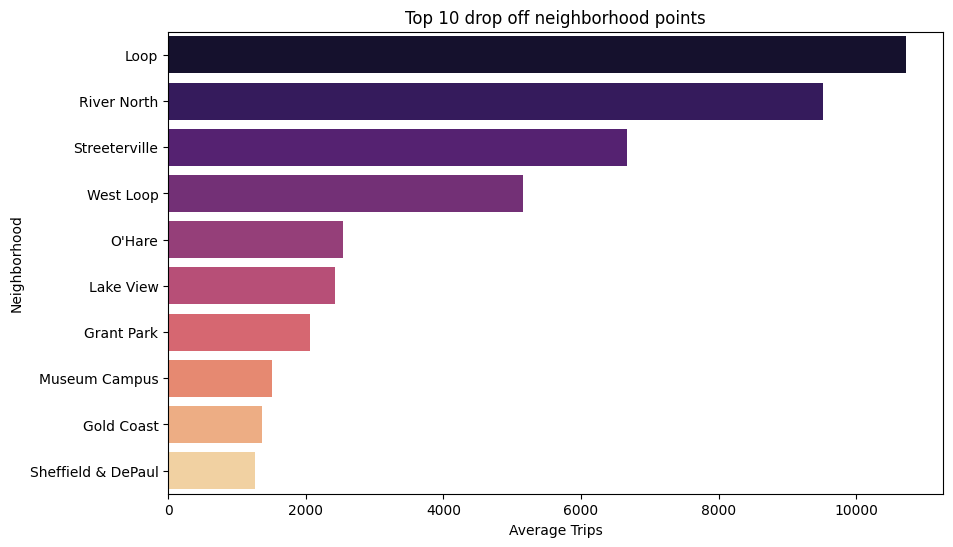

In [ ]:
top_10_neighborhoods = chicago.sort_values(by='average_trips', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_neighborhoods, palette='magma')
plt.xlabel('Average Trips')
plt.ylabel('Neighborhood')
plt.title('Top 10 drop off neighborhood points')
plt.show()


*De acuerdo a esta gráfica se ve que los vecindarios de destino más populares se concentran más que nada alrededor de Loop, River North y Streeterville. Que de acuerdo a una breve búsqueda en internet se descubre que es el corazón financiero, distrito de las artes y zona de bienes raíces de lujo respectivamente. Lo cual sugiere que estos destinos son muy buscados por los usuarios, lo cual lo haría un punto atractivo para el turismo.*

#Paso 5. Prueba de hipótesis (Python)

Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

In [ ]:
print(loop.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


*Se sacan los encabezados del data frame al que se ha llamado loop para describir los viajes desde loop hasta el aeropuerto O'Hare, después se convierte la columna start_ts a datetime para poder extraer los días sábados y la situación climatológica en Bad (asumiendo que se determina malo al clima lluvioso lo cual es bastante probable). Después se hace otro filtro con la condición contraria que seria Good para ver los sábados que no llueve y hacer la comparativa. Se sacan muestras de 50 valores, se ajusta el valor de significancia en 0.05, y se escribe un string para que nos diga si se rechaza o no la hipótesis nula.*

In [ ]:
loop['start_ts'] = pd.to_datetime(loop['start_ts'])
rainy_data = loop[(loop['start_ts'].dt.weekday == 5) & (loop['weather_conditions'] == 'Bad')]
nice_data = loop[(loop['start_ts'].dt.weekday == 5) & (loop['weather_conditions'] == 'Good')]

rainy_sample = rainy_data['duration_seconds'].sample(n=50, random_state=42)
nice_sample = nice_data['duration_seconds'].sample(n=50, random_state=42)

levene_results = st.levene(rainy_sample, nice_sample)
print('Valor p de la prueba de Levene: ', levene_results.pvalue)

alpha = 0.05


if levene_results.pvalue < alpha:
    print('Rechazo la hipótesis nula de igualdad de varianzas')
    equal_var = False
else:
    print('No puedo rechazar la hipótesis nula de igualdad de varianzas')
    equal_var = True


ttest_results = st.ttest_ind(rainy_sample, nice_sample, equal_var=equal_var)
print('Valor p de la prueba t: ', ttest_results.pvalue)

if ttest_results.pvalue < alpha:
    print('Rechazo la hipótesis nula')
else:
    print('No puedo rechazar la hipótesis nula')


Valor p de la prueba de Levene:  0.4429769342126756
No puedo rechazar la hipótesis nula de igualdad de varianzas
Valor p de la prueba t:  0.1749215677785973
No puedo rechazar la hipótesis nula


#Conclusión#

El valor p de la prueba de Levene fue de 0.4429, que es mayor que el nivel de significancia de 0.05. Por lo tanto, no podemos rechazar la hipótesis nula de que ambas varianzas son iguales, en otras palabras, no podemos asumir que las varianzas en cuanto a duración de viajes en días con clima lluvioso y clima despejado sean similares.

El valor p de la prueba t fue de 0.1749, que también es mayor que el nivel de significancia de 0.05. Debido a esto tampoco se puede rechazar la hipótesis nula de que no hay diferencia en la duración promedio de los viajes. Lo cual quiere decir que no hay evidencia de que las condiciones meteorológicas tengan un impacto significativo en la duración promedio de los viajes.

Basados en los datos y el análisis realizado, no hay evidencia estadística suficiente para concluir que la duración promedio de los viajes desde el Loop al Aeropuerto O'Hare cambia significativamente los sábados lluviosos.
La hipótesis nula se formuló en sentido de que es la situación por defecto, que se asume como cierta a menos de descubrir lo contrario al comprobar la hipótesis, es decir, que la duración promedio de los viajes es la misma en días lluviosos y no lluviosos.
La hipótesis alternativa es que la duración promedio de los viajes si es diferente en días lluviosos y no lluviosos, la cual es la que probamos.
Usamos la prueba t por ser la más común entre poblaciones que se presume pueden ser diferentes, ya que se adapta a esta situación en particular con un nivel de significancia en 0.05, con lo cual aceptamos un 5% de probabilidad de rechazar la hipótesis nula, el cual es un nivel de significancia utilizado en muchas pruebas estadísticas. Asímismo se incorpora la prueba Levene para poder asumir varianzas iguales de esta forma la prueba T se realizó bajo esa suposición.

Si bien estos resultados no denotan una relación significativa en cuanto a las condiciones del clima y la duración de los viajes de la plataforma Zuber, sería importante ampliar el tamaño de la muestra o hacer un análisis más profundo de cada tipo de clima (guardadas las proporciones por supuesto) para poder obtener conclusiones e insights más profundas.

Sin embargo, si se puede considerar el presente estudio como una aproximación eficaz para intentar comprender la relación entre estas dos variables. Los datos fueron suficientes para poder llegar a las presentes conclusiones asi como para comprobar las hipótesis planteadas.


















